In [1]:
!pip install snscrape

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd #working with relational data
import nltk
#from nltk.corpus import movie_reviews
import tweepy                  #for accessing twitter API
from textblob import TextBlob  #processing textual data
from wordcloud import WordCloud  #frequency/importance of words in text data
import numpy as np              #for arrays and matrices
import re                        #regular expressions
import matplotlib.pyplot as plt   #for plotting
plt.style.use('seaborn-talk');
nltk.download('stopwords') # download stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# SCRAPPING AMAZON DATA TWEETS

In [3]:
query = "(to:Amazon) until:2023-04-01 since:2022-01-01"
tweets = []
limit = 30000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
     if len(tweets) == limit:
        break
     else:
        tweets.append([tweet.date, tweet.user.username, tweet.rawContent])

In [4]:
data = pd.DataFrame(tweets, columns=['Date', 'User', 'text'])

# STORE TWEETS IN AMAZONTWEETS.CSV

In [5]:
data.to_csv('Amazontweets.csv')

# load data

In [6]:
amazon_data = pd.read_csv('Amazontweets.csv')

In [7]:
amazon_data.head(50)

,Unnamed: 0,Date,User,text
0,0,2023-03-31 23:49:32+00:00,cwsouthworth,@amazon @AmazonHelp @PrimeVideo \n\nWhen I buy...
1,1,2023-03-31 23:45:42+00:00,Puddingshorts,@amazon The reason people pay over $120 a year...
2,2,2023-03-31 23:43:40+00:00,mnstevet,@amazon will today's delivery be the 3rd in a ...
3,3,2023-03-31 23:23:55+00:00,Puddingshorts,@amazon Dress shoes for my sons prom tomorrow ...
4,4,2023-03-31 23:22:27+00:00,Corsair_Lyfe,@amazon y’all delivering in Tornadoes now? Y’a...
5,5,2023-03-31 23:16:29+00:00,SRCREAT39941598,@amazon I am ordered boat headfone but recive ...
6,6,2023-03-31 22:41:48+00:00,NHKaze,@amazon WHEN I CATCH YOU
7,7,2023-03-31 22:41:20+00:00,philsurles,@amazon I've never received a package sent thr...
8,8,2023-03-31 22:33:00+00:00,trtr203040,@amazon 定期おトク便のシステムがずっと変です。変な動きをしています。注文してない注文...
9,9,2023-03-31 22:27:18+00:00,ssusannss55,@amazon Hi can you get rid of that horrible Pr...


# DATA CLEANING

In [8]:
stopwords.words('english')

def cleanText(text):
  text = re.sub(r'@[a-zA-z0-9]+', '', text) # remove @mentions
  text = re.sub(r'#', '', text)# getting rid of #
  text = re.sub(r'RT[\s]+', '', text) #removes RT(retweets)
  text = re.sub(r'https?:\/\/\S+', '', text)# getting rid of hyperlinks
  text = text.encode('ascii', 'ignore').decode('ascii')#removing non-ascii characters'
  text = re.sub(r'[^\w\s]', '', text) # remove punctuation #can use [^\w\s] or [‘’“”…,] or !"#\$%&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`{\|}~ #[^\w\s] removes any character that is not a letter, digit, or underscore) or whitespace.^ means is not
  text = text.lower() #convert text to lowercase
  text = re.sub(r'[^a-zA-Z\s]', '', text) #remove numbers and keep text/alphabet only
  text = re.sub(r'\n\n', '', text) # remove \n\n
  text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # remove stopwords 

  return(text)

amazon_data['text'] = amazon_data['text'].apply(cleanText)

In [9]:
#show the cleaned text
amazon_data

,Unnamed: 0,Date,User,text
0,0,2023-03-31 23:49:32+00:00,cwsouthworth,buy something like video sd dont crop dont str...
1,1,2023-03-31 23:45:42+00:00,Puddingshorts,reason people pay year service rely orders mak...
2,2,2023-03-31 23:43:40+00:00,mnstevet,todays delivery rd row delayed next day wtf pr...
3,3,2023-03-31 23:23:55+00:00,Puddingshorts,dress shoes sons prom tomorrow ordered wednesd...
4,4,2023-03-31 23:22:27+00:00,Corsair_Lyfe,yall delivering tornadoes yall dont play aint ...
...,...,...,...,...
29995,29995,2022-12-05 11:52:23+00:00,LvntTmr,kargosu hzl da sat etik ahlak zayf u tketici k...
29996,29996,2022-12-05 11:38:31+00:00,Meonkush_,
29997,29997,2022-12-05 11:37:09+00:00,pankajsagar1111,requesting please close amazon pay later accou...
29998,29998,2022-12-05 11:27:27+00:00,BK4SURE,received recent order ordered pair dolce amp g...


# LEMMATIZATION

In [10]:
def lemmatize_text(text):
    """
    Lemmatizes the input text using WordNetLemmatizer from NLTK library.
    
    Args:
    text (str): The input text to be lemmatized.
    
    Returns:
    str: The lemmatized text.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])
    return lemmatized_text
amazon_data['text'] = amazon_data['text'].apply(lemmatize_text)

In [11]:
amazon_data

,Unnamed: 0,Date,User,text
0,0,2023-03-31 23:49:32+00:00,cwsouthworth,buy something like video sd dont crop dont str...
1,1,2023-03-31 23:45:42+00:00,Puddingshorts,reason people pay year service rely order make...
2,2,2023-03-31 23:43:40+00:00,mnstevet,today delivery rd row delayed next day wtf pri...
3,3,2023-03-31 23:23:55+00:00,Puddingshorts,dress shoe son prom tomorrow ordered wednesday...
4,4,2023-03-31 23:22:27+00:00,Corsair_Lyfe,yall delivering tornado yall dont play aint ne...
...,...,...,...,...
29995,29995,2022-12-05 11:52:23+00:00,LvntTmr,kargosu hzl da sat etik ahlak zayf u tketici k...
29996,29996,2022-12-05 11:38:31+00:00,Meonkush_,
29997,29997,2022-12-05 11:37:09+00:00,pankajsagar1111,requesting please close amazon pay later accou...
29998,29998,2022-12-05 11:27:27+00:00,BK4SURE,received recent order ordered pair dolce amp g...


# DATA EXPLORATION

In [12]:
# View the DataFrame Information
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   Date        30000 non-null  object
 2   User        30000 non-null  object
 3   text        30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [13]:
# View DataFrame Statistical Summary
amazon_data.describe()

,Unnamed: 0
count,30000.000000
mean,14999.500000
std,8660.398374
min,0.000000
25%,7499.750000
50%,14999.500000
75%,22499.250000
max,29999.000000


In [14]:
#drop user column
#1 rep column and 0 rep row
amazon_data = amazon_data.drop(['User'], axis=1)
amazon_data

,Unnamed: 0,Date,text
0,0,2023-03-31 23:49:32+00:00,buy something like video sd dont crop dont str...
1,1,2023-03-31 23:45:42+00:00,reason people pay year service rely order make...
2,2,2023-03-31 23:43:40+00:00,today delivery rd row delayed next day wtf pri...
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow ordered wednesday...
4,4,2023-03-31 23:22:27+00:00,yall delivering tornado yall dont play aint ne...
...,...,...,...
29995,29995,2022-12-05 11:52:23+00:00,kargosu hzl da sat etik ahlak zayf u tketici k...
29996,29996,2022-12-05 11:38:31+00:00,
29997,29997,2022-12-05 11:37:09+00:00,requesting please close amazon pay later accou...
29998,29998,2022-12-05 11:27:27+00:00,received recent order ordered pair dolce amp g...


In [15]:
#cheecks for null elements
amazon_data.isnull()

,Unnamed: 0,Date,text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29995,False,False,False
29996,False,False,False
29997,False,False,False
29998,False,False,False


<AxesSubplot:>

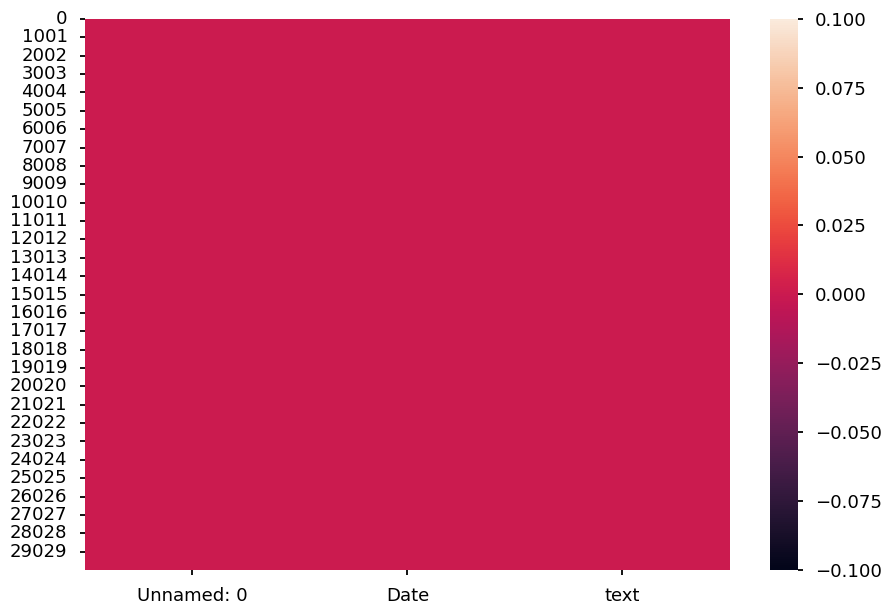

In [16]:
import seaborn as sns #for data visualization
#checks for null elements
sns.heatmap(amazon_data.isnull())

In [17]:
# Let's get the length of the verified_reviews column
amazon_data['length'] = amazon_data['text'].apply(len)
amazon_data

,Unnamed: 0,Date,text,length
0,0,2023-03-31 23:49:32+00:00,buy something like video sd dont crop dont str...,119
1,1,2023-03-31 23:45:42+00:00,reason people pay year service rely order make...,161
2,2,2023-03-31 23:43:40+00:00,today delivery rd row delayed next day wtf pri...,106
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow ordered wednesday...,173
4,4,2023-03-31 23:22:27+00:00,yall delivering tornado yall dont play aint ne...,103
...,...,...,...,...
29995,29995,2022-12-05 11:52:23+00:00,kargosu hzl da sat etik ahlak zayf u tketici k...,98
29996,29996,2022-12-05 11:38:31+00:00,,0
29997,29997,2022-12-05 11:37:09+00:00,requesting please close amazon pay later accou...,126
29998,29998,2022-12-05 11:27:27+00:00,received recent order ordered pair dolce amp g...,128


<AxesSubplot:ylabel='Frequency'>

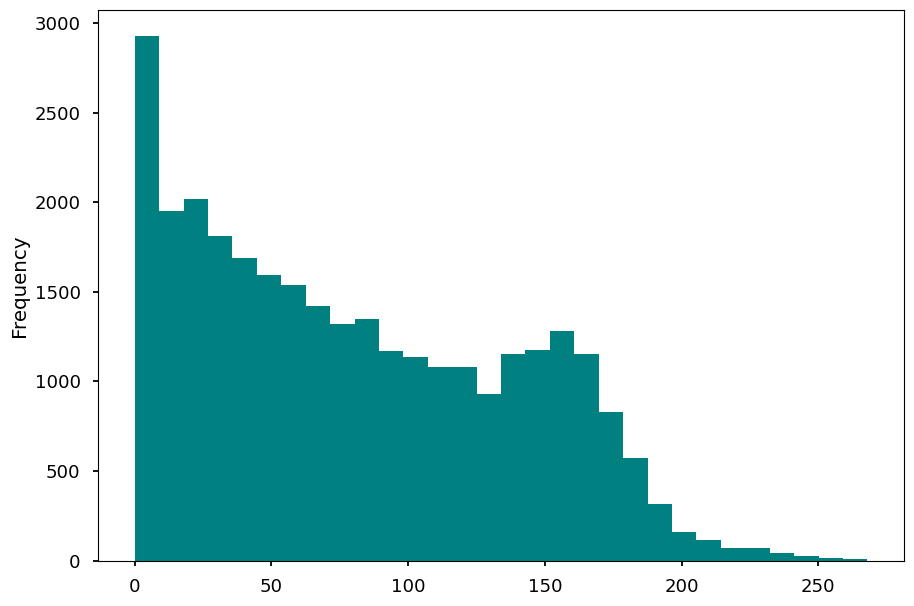

In [18]:
# Plot the histogram for the length
amazon_data['length'].plot(bins = 30, kind= 'hist', color = 'teal')

In [19]:
#The head() function to displays the shortest text:
print(amazon_data.head(1)['text'])

0    buy something like video sd dont crop dont str...
Name: text, dtype: object


In [20]:
sorted_data = amazon_data.sort_values(by='length')

In [21]:
#sorts length by ascending order
amazon_data_sorted = amazon_data.sort_values(by='length', ascending=True)
print(amazon_data_sorted)

       Unnamed: 0                       Date  \
4289         4289  2023-03-12 17:57:33+00:00   
18106       18106  2023-01-13 16:30:48+00:00   
5128         5128  2023-03-09 00:35:43+00:00   
14086       14086  2023-01-27 18:14:50+00:00   
28393       28393  2022-12-09 18:37:38+00:00   
...           ...                        ...   
21107       21107  2023-01-01 09:17:23+00:00   
27570       27570  2022-12-12 19:00:46+00:00   
21307       21307  2022-12-31 11:25:55+00:00   
10638       10638  2023-02-12 17:04:40+00:00   
1378         1378  2023-03-24 05:29:18+00:00   

                                                    text  length  
4289                                                           0  
18106                                                          0  
5128                                                           0  
14086                                                          0  
28393                                                          0  
...                  

In [22]:
#The head() function to displays the shortest text:
print(sorted_data.head(1)['text'])

4289    
Name: text, dtype: object


In [23]:
#the tail() function to displays the longest text:
print(sorted_data.tail(1)['text'])

1378    aap coustmer k satha fraud kare ho aur uska pa...
Name: text, dtype: object


In [24]:
# Apply the describe method to get statistical summary
amazon_data.describe()

,Unnamed: 0,length
count,30000.000000,30000.000000
mean,14999.500000,80.470900
std,8660.398374,57.912392
min,0.000000,0.000000
25%,7499.750000,29.000000
50%,14999.500000,72.000000
75%,22499.250000,129.000000
max,29999.000000,268.000000


In [25]:
#create a function to get subjectivity i.e how opiniated an opinion is
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get polarity i.e how positive or negative an opinion is
def getPolarity(text):
  return TextBlob(text).sentiment.polarity 

#create two columns  
amazon_data['Subjectivity'] = amazon_data['text'].apply(getSubjectivity)
amazon_data['Polarity'] = amazon_data['text'].apply(getPolarity)

amazon_data

,Unnamed: 0,Date,text,length,Subjectivity,Polarity
0,0,2023-03-31 23:49:32+00:00,buy something like video sd dont crop dont str...,119,1.000000,-0.500000
1,1,2023-03-31 23:45:42+00:00,reason people pay year service rely order make...,161,0.500000,-0.166667
2,2,2023-03-31 23:43:40+00:00,today delivery rd row delayed next day wtf pri...,106,0.500000,-0.250000
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow ordered wednesday...,173,0.433333,-0.266667
4,4,2023-03-31 23:22:27+00:00,yall delivering tornado yall dont play aint ne...,103,0.500000,0.500000
...,...,...,...,...,...,...
29995,29995,2022-12-05 11:52:23+00:00,kargosu hzl da sat etik ahlak zayf u tketici k...,98,0.000000,0.000000
29996,29996,2022-12-05 11:38:31+00:00,,0,0.000000,0.000000
29997,29997,2022-12-05 11:37:09+00:00,requesting please close amazon pay later accou...,126,0.131250,-0.012500
29998,29998,2022-12-05 11:27:27+00:00,received recent order ordered pair dolce amp g...,128,0.481250,-0.133333


# PLOTTING WORDCLOUD

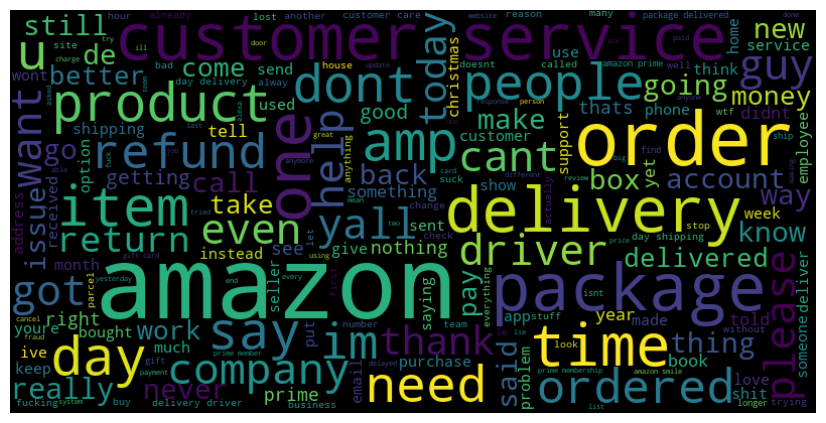

In [26]:
allWords = ' '.join(txt for txt in amazon_data['text'])
wordCloud = WordCloud(width =800, height=400, random_state=21, max_font_size =100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [27]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score <= 0.5:
    return  'Neutral'
  else:
    return 'Positive'
amazon_data['Analysis'] = amazon_data['Polarity'].apply(getAnalysis)

#show dataframe
amazon_data

,Unnamed: 0,Date,text,length,Subjectivity,Polarity,Analysis
0,0,2023-03-31 23:49:32+00:00,buy something like video sd dont crop dont str...,119,1.000000,-0.500000,Negative
1,1,2023-03-31 23:45:42+00:00,reason people pay year service rely order make...,161,0.500000,-0.166667,Negative
2,2,2023-03-31 23:43:40+00:00,today delivery rd row delayed next day wtf pri...,106,0.500000,-0.250000,Negative
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow ordered wednesday...,173,0.433333,-0.266667,Negative
4,4,2023-03-31 23:22:27+00:00,yall delivering tornado yall dont play aint ne...,103,0.500000,0.500000,Neutral
...,...,...,...,...,...,...,...
29995,29995,2022-12-05 11:52:23+00:00,kargosu hzl da sat etik ahlak zayf u tketici k...,98,0.000000,0.000000,Neutral
29996,29996,2022-12-05 11:38:31+00:00,,0,0.000000,0.000000,Neutral
29997,29997,2022-12-05 11:37:09+00:00,requesting please close amazon pay later accou...,126,0.131250,-0.012500,Negative
29998,29998,2022-12-05 11:27:27+00:00,received recent order ordered pair dolce amp g...,128,0.481250,-0.133333,Negative


In [28]:
#print all of the positive text order from most positive text
j=1
sortedDF= amazon_data.sort_values(by=['Polarity'])#sortedDF sorts values by polarity

for i in range (0, sortedDF.shape[0]): #loops through sortedDF and prints analysis at i if positive
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') ' + sortedDF['text'][i])
    print()
    j = j+1
    if j > 10:  # Limit to 10 positive texts
            break

1) selling trump shirt incite another insurrection remember wonderful affinity group supported woman needed travel abortion people inciting riot leader

2) hellanother great packaging job amazon even bother purchasing

3) loved thing got mail

4) beautiful girl ad home decor

5) pls asvise whether analyse member tweet kind tweet acceptable

6) either one care call b article know vote acquirement amazon reason dont need help opinion could best investment st century amc apesnotleaving

7) absolutely amazing beautiful

8) ordered fiji water supposed delivered yesterday monday arrived unacceptable im happy something need done

9) excellent

10) point paying prime year almost everything ordered prim shipping got day best part get night shipping hey ran issue get day prime



In [29]:
#print all of the negative text order from most negative text
j=1
sortedDF= amazon_data.sort_values(by=['Polarity'], ascending = False)#sortedDF sorts values by polarity

for i in range (0, sortedDF.shape[0]): #loops through sortedDF and prints analysis at i if positive
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') ' + sortedDF['text'][i])
    print()
    j = j+1
    if j > 10:  # Limit to 10 negative texts
            break

1) buy something like video sd dont crop dont stretch video fitjust deliver sd rectangular pixelsunclear nothing difficult

2) reason people pay year service rely order make order havent arrived screwed shipping didnt arrive really needed son oh im disabled guess ill go looking somewhere

3) today delivery rd row delayed next day wtf prime like whenever walmart target pricing alone get drop prime

4) dress shoe son prom tomorrow ordered wednesday pm sent blue soccer shin guardsnow offer going help really min phone agentsflagrant insulting offer dress shoe son st prom thx

5) ordered boat headfone recive cartoon inside box repeatedly contacted amazon give resolutionvery bad customer service amazonplease dont order amazon

6) hi get rid horrible prime commercial girl heavy mustache buying yellow jacket creepy paramount showing every minute

7) sick verify account every time log computer keep phone hip canceled lot service week close canceling sick alexa turning whenever want also office 

In [30]:
#print all of the neutral text order from most neutral text
j=1
sortedDF= amazon_data.sort_values(by=['Polarity'], ascending = False)#sortedDF sorts values by polarity

for i in range (0, sortedDF.shape[0]): #loops through sortedDF and prints analysis at i if positive
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) + ') ' + sortedDF['text'][i])
    print()
    j = j+1
    if j > 10:  # Limit to 10 neutral texts
            break

1) yall delivering tornado yall dont play aint never letting prime go hope everyone stay safe protected lr

2) catch

3) ive never received package sent time often dont receive least last time didnt get tried deliver email separate package delivered yesterday honestly dont think real company

4) 

5) good lace wig remember hear first

6) know theives friend bought skid got beck massage pd got earbuds offered refund said get full skid returned stuff

7) wtf every time go proceed top check get sorry page dog im say screw order barnes noble last time ive tried trying

8) kitchen hack

9) great chance show web web instead roadmap entire marketplace bearish af wouldve bullish launching kindle e reader rip

10) amazon delivery driver mr delawrence jones routine package delivery stopping residence adjust amp salute american flag complete class act mr jones set wonderful example many god bless daily travel



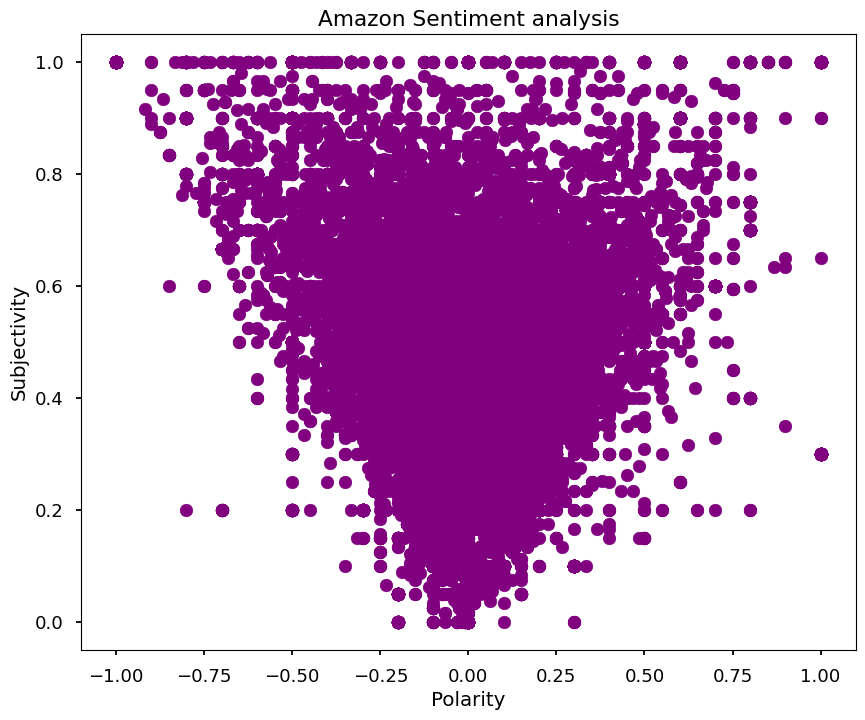

In [31]:
#plot the polarity and subjectivity
plt.figure(figsize=(10,8))
for i in range (0, amazon_data.shape[0]):
  plt.scatter(amazon_data['Polarity'][i], amazon_data['Subjectivity'][i], color='Purple')

plt.title('Amazon Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
#get percentage of positive text
positive_amazon_data=amazon_data[amazon_data.Analysis == 'Positive']
positive_amazon_data = positive_amazon_data['text']

round( (positive_amazon_data.shape[0]/amazon_data.shape[0])*100, 1)

3.3

In [33]:
#get percentage of negative text
negative_amazon_data=amazon_data[amazon_data.Analysis == 'Negative']
negative_amazon_data = negative_amazon_data['text']

round( (negative_amazon_data.shape[0]/amazon_data.shape[0])*100, 1)

28.4

In [34]:
#get percentage of neutral text
neutral_amazon_data=amazon_data[amazon_data.Analysis == 'Neutral']
neutral_amazon_data = neutral_amazon_data['text']

round( (neutral_amazon_data.shape[0]/amazon_data.shape[0])*100, 1)

68.3

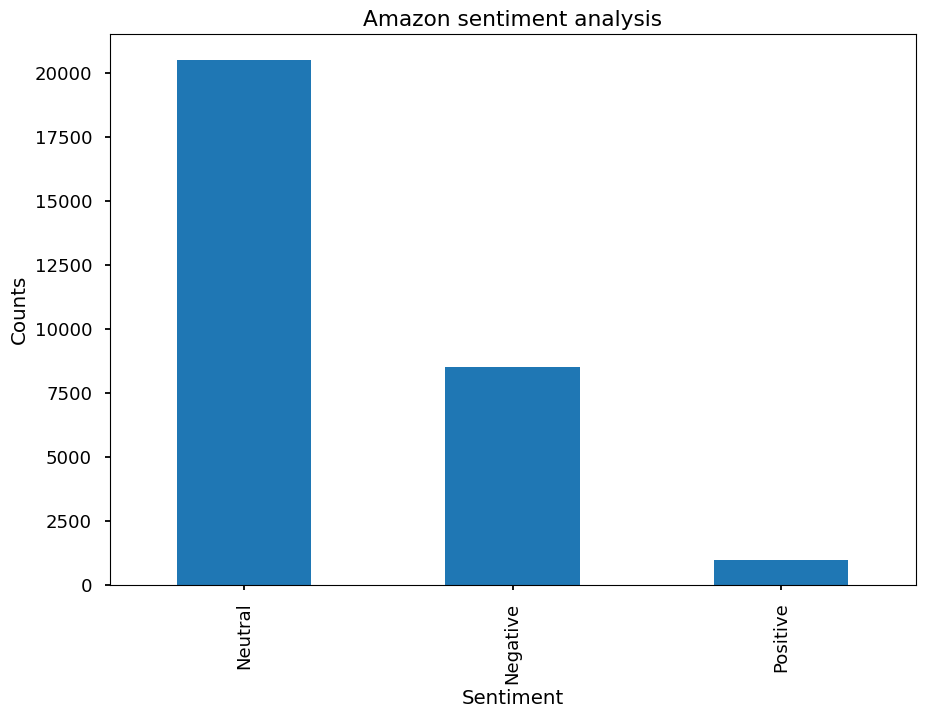

In [35]:
#show value count
amazon_data['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Amazon sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
amazon_data['Analysis'].value_counts().plot(kind= 'bar') #plots a bar graph
plt.show()

# DATA TRAINING

In [36]:
#Feature extraction using TfidfVectorizer 
#fit_transform: learns vocabulary and idf & returns document term matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(amazon_data['text'])
y = amazon_data['Analysis']

In [37]:
#create training and testing sets
#test size rep % of data in test set.
#random_state controls randomization during splitting
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 29667)
(24000,)
(6000, 29667)
(6000,)


In [38]:
#Uses Naives Bayes algorithm to train the model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #classification_report
# Evaluate nb_model performance
y_pred = nb_model.predict(X_test)

accuracy_level = accuracy_score(y_test, y_pred)*100
precision_level = precision_score(y_test, y_pred, average='weighted')*100
recall_score_level= recall_score(y_test, y_pred, average='weighted')*100
f1_score_level = f1_score(y_test, y_pred, average='weighted')*100

print('Accuracy:', accuracy_level)
print('Precision:', precision_level)
print('Recall Score:', recall_score_level)
print('F1_score:', f1_score_level)

Accuracy: 75.36666666666667
Precision: 78.13354614876302
Recall Score: 75.36666666666667
F1_score: 69.21294797618138


In [40]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

SVCmodel = SVC(kernel='rbf', random_state = 1)
LRmodel = LogisticRegression(solver='liblinear', random_state=0)

In [41]:
LRmodel.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
LRmodel.fit(Xtrain, ytrain)
prediction2 = LRmodel.predict(Xtest)

score2 = accuracy_score(ytest, prediction2)*100
score2

86.21666666666667

In [43]:
SVCmodel.fit(X,y)

SVC(random_state=1)

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
SVCmodel.fit(Xtrain, ytrain)
prediction3 = SVCmodel.predict(Xtest)

score3 = accuracy_score(ytest, prediction3)*100
score3

88.31666666666666

In [55]:
# Use the nb_model to make predictions on new text data
# Replace the new text in analyze_text
analyze_text = ['I hate amazon. Their services are poor']
clean_new_text = [cleanText(text) for text in analyze_text] #clean new text
lemmatized_new_text = [lemmatize_text(text) for text in clean_new_text] # Lemmatize new text
new_X = vectorizer.transform(lemmatized_new_text)
new_y = nb_model.predict(new_X)
print('The prediction is :', new_y)

The prediction is : ['Negative']


In [58]:
# Use the lRmodel to make predictions on new text data
# Replace the new text in analyze_text
analyze_text = ['I shop at amazon. Sometimes their services are good and at other times they are bad.']
clean_new_text = [cleanText(text) for text in analyze_text] #clean new text
lemmatized_new_text = [lemmatize_text(text) for text in clean_new_text] # Lemmatize new text
new_X = vectorizer.transform(lemmatized_new_text)
new_y = LRmodel.predict(new_X)
print('The prediction is :', new_y)

The prediction is : ['Neutral']


In [61]:
# Use the SVCmodel to make predictions on new text data
# Replace the new text in analyze_text
analyze_text = ['I enjoy shopping at amazon.']
clean_new_text = [cleanText(text) for text in analyze_text] #clean new text
lemmatized_new_text = [lemmatize_text(text) for text in clean_new_text] # Lemmatize new text
new_X = vectorizer.transform(lemmatized_new_text)
new_y = SVCmodel.predict(new_X)
print('The prediction is :', new_y)

The prediction is : ['Neutral']
